In [18]:
import os
os.listdir()
import numpy as np
import pandas as pd
pd.set_option('display.mpl_style', 'default')

C:\Users\chiangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
weather_2012 = pd.read_csv('weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5]

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


You'll see that the 'Weather' column has a text description of the weather that was going on each hour. We'll assume it's snowing if the text description contains "Snow".

pandas provides vectorized string functions, to make it easy to operate on columns containing text. There are some great examples in the documentation.

In [13]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')

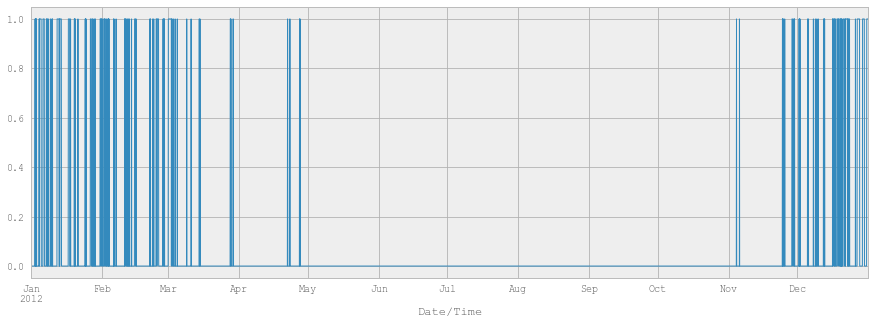

In [16]:
# let's plot
is_snowing.plot(figsize=(15,5))

If we wanted the median temperature each month, we could use the resample() method like this:

C:\Users\chiangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.


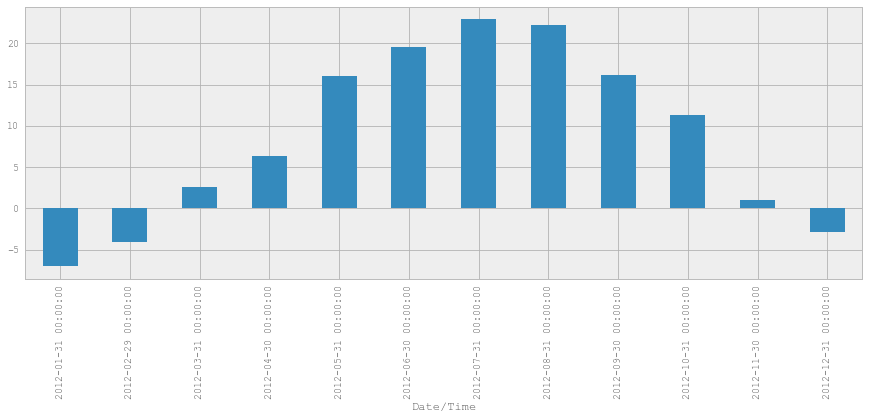

In [21]:
weather_2012['Temp (C)'].resample('M', how=np.median).plot(kind='bar', figsize=(15,5))

In [24]:
is_snowing.astype(float)[:10]

Date/Time
2012-01-01 00:00:00    0.0
2012-01-01 01:00:00    0.0
2012-01-01 02:00:00    0.0
2012-01-01 03:00:00    0.0
2012-01-01 04:00:00    0.0
2012-01-01 05:00:00    0.0
2012-01-01 06:00:00    0.0
2012-01-01 07:00:00    0.0
2012-01-01 08:00:00    0.0
2012-01-01 09:00:00    0.0
Name: Weather, dtype: float64

C:\Users\chiangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


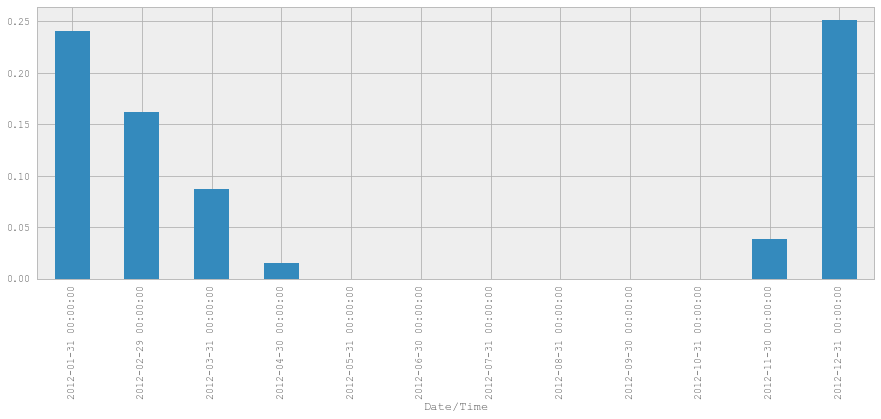

In [27]:
# use resample to find the percentage of time it was snowing each month
is_snowing.astype(float).resample('M', how=np.mean).plot(kind='bar', figsize=(15,5))

In [28]:
temperature = weather_2012['Temp (C)'].resample('M', how=np.median)
is_snowing = weather_2012['Weather'].str.contains('Snow')
snowiness = is_snowing.astype(float).resample('M', how=np.mean)

# Name the columns
temperature.name = "Temperature"
snowiness.name = "Snowiness"

C:\Users\chiangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """Entry point for launching an IPython kernel.
C:\Users\chiangi\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
stats = pd.concat([temperature, snowiness], axis=1)
stats

,Temperature,Snowiness
Date/Time,,
2012-01-31,-7.05,0.240591
2012-02-29,-4.10,0.162356
2012-03-31,2.60,0.087366
2012-04-30,6.30,0.015278
2012-05-31,16.05,0.000000
2012-06-30,19.60,0.000000
2012-07-31,22.90,0.000000
2012-08-31,22.20,0.000000
2012-09-30,16.10,0.000000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D8AAFD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB9B588>], dtype=object)

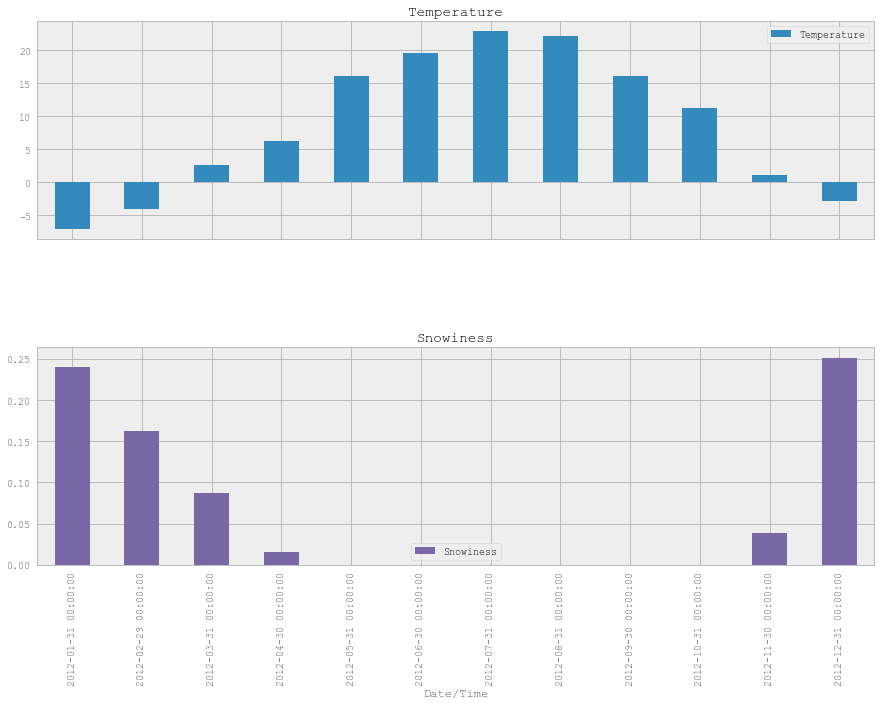

In [30]:
stats.plot(kind='bar', subplots=True, figsize=(15, 10))